<a href="https://colab.research.google.com/github/junaidkhan37/AmazonCouponReasearch/blob/main/Analyzing%20coupon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Couponstudy

## Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

## Load data

In [14]:
data = pd.read_csv('data/coupons.csv')
warnings.filterwarnings("ignore")

## Analyzing the data

In [15]:
pd.set_option('display.max_column', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In this code we've gotten more detailed data with more columns of customer's information

## Investigate the dataset for missing or problematic data.

In [16]:
data.count()

,0
destination,12684
passanger,12684
weather,12684
temperature,12684
time,12684
coupon,12684
expiration,12684
gender,12684
age,12684
maritalStatus,12684


In [17]:
# Calculate percentage of missing data for each column
missing_percentage = (data.isna().sum() / len(data)) * 100
missing_count=data.isna().sum()

# Display the percentages sorted from highest to lowest
print("Percentage of missing values per column:\n")
print(missing_percentage.sort_values(ascending=False))
# Display the percentages sorted from highest to lowest
print("Count of missing values per column:\n")
print(missing_count.sort_values(ascending=False))

Percentage of missing values per column:

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
weather                  0.000000
temperature              0.000000
destination              0.000000
passanger                0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
income                   0.000000
occupation               0.000000
has_children             0.000000
education                0.000000
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64
Count of missing values per column:

car                   

Explanation

The dataset contains information about drivers, their demographics, and driving conditions related to coupon acceptance behavior. After inspecting missing values, we found that the car column had too many missing entries and was dropped. Other columns like Bar, CoffeeHouse, and CarryAway, RestaurantLessThan20 and Restaurant20To50 had relatively few missing values, which were filled using the most frequent value (mode) to keep the data consistent for analysis.

Car (99.15%) → Almost all values are missing, meaning this column has very little usable data. It’s best to drop this column.
CoffeeHouse (1.71%), Restaurant20To50 (1.49%), CarryAway (1.19%), RestaurantLessThan20 (1.02%), and Bar (0.84%) → Only a small fraction of data is missing here, less than 2%. This is minor and can be handled easily, for example, by filling missing values with a default like “never.”

Car (12,576 missing values) → This column has almost all its entries missing (out of 12,684 total), making it unusable. It should be dropped from the dataset.
CoffeeHouse (217 missing), Restaurant20To50 (189 missing), CarryAway (151 missing), RestaurantLessThan20 (130 missing), Bar (107 missing) → These columns have very few missing values compared to the total dataset. The missing data here is minor and can be filled with a reasonable default, such as "never", to maintain consistency

## Deciding what to do about your missing data

In [18]:
# 1. Check how many missing values each column has
missing_vals = data.isnull().sum()
print("Missing values per column:\n")
print(missing_vals)

# 2. Decide what to do:
# - 'car' has many missing values (almost all) → drop
# - Frequency columns (Bar, CoffeeHouse, etc.) have few missing values → replace with 'never'
# - Other columns have no missing values → keep as is

# Drop 'car' column due to excessive missing data
data.drop(columns=['car'], inplace=True)

# Fill missing values in frequency-based columns with 'never'
freq_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[freq_cols] = data[freq_cols].fillna('never')

# 3. Verify that there are no missing values left
print("\nMissing values after cleaning:\n")
print(data.isnull().sum())

# 4. (Optional) Confirm cleaned data shape
print(f"\n✅ Cleaned DataFrame shape: {data.shape}")

Missing values per column:

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Missing values after cleaning:

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon          

Explanation

In this step, we handled missing data to prepare the dataset for analysis. First, we checked how many missing values each column contained. The car column had too many missing entries, so it was dropped from the dataset. The frequency-based columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50) had only a few missing values, so we replaced them with "never" to stay consistent. After cleaning, we verified that no missing values remained and confirmed the new shape of the cleaned DataFrame.

##Analyzing the proportion of customers accepted coupons

In [19]:
# Calculate the proportion of people who accepted the coupon
acceptance_rate = data['Y'].mean()

print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.2f}")

Proportion of observations that accepted the coupon: 0.57


Explanation

The propotion of total observations that accepted the coupons is 57%

##Now using bar plot to visualize the coupon column

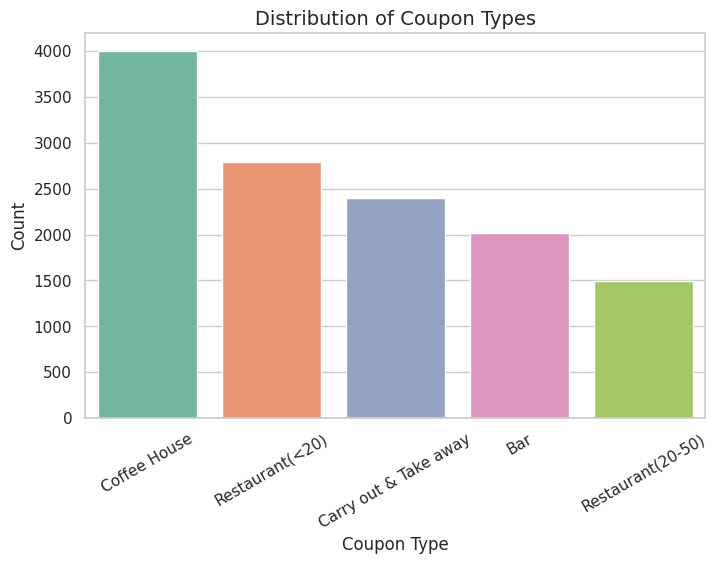

In [20]:


# Set a clean style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8,5))
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index, palette='Set2')

# Add titles and labels
plt.title('Distribution of Coupon Types', fontsize=14)
plt.xlabel('Coupon Type')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=30)

# Show the plot
plt.show()

Explanation

The bar shows that the coffee house coupon has been the most distributed coupon type followed by Restaurant<20, Carryout & Take away, Bar, Restaurant(20-50) respectively

##Now using the histogram to visualize the temprature column

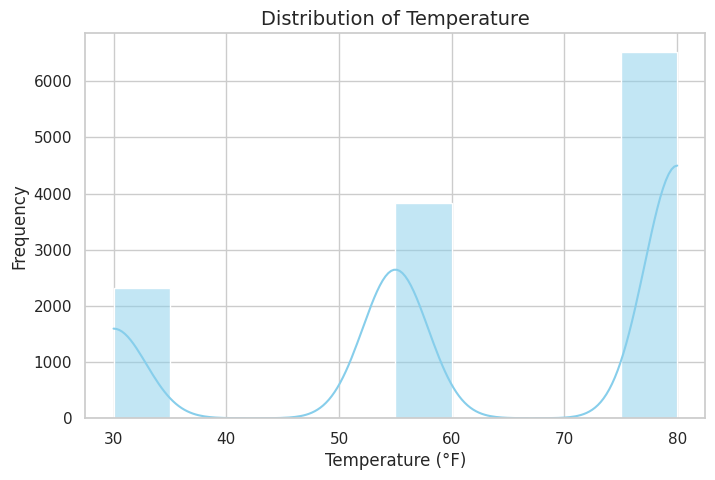

In [21]:


# Set plot style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8,5))
sns.histplot(data['temperature'], bins=10, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Temperature', fontsize=14)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Explanation

The histogram shows that the people have acccepted more coupons when the temprature was hot or it was sunny outside